In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # criação de gráficos 
import seaborn as sns # criação de gráficos (histplot e boxplot)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-songs-dataset/spotify_songs_dataset.csv


# OBJETIVO DO PROJETO 🧑‍💻
**Análisar o dataset, realizar o tratamento de dados e obter insights.**

**Criação de gráficos para melhor visualização do usuário.**

**Entender qual a tendência dos dados, como eles se relacionam e como podem ser utilizados no cotidiano.**

**Manipular todas as colunas do dataset de forma que obtenha insights significativos para a análise.**

**Importação do database e armazenamento em uma variável denominada (df)**

In [2]:
df = pd.read_csv('/kaggle/input/spotify-songs-dataset/spotify_songs_dataset.csv')
df.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN


**Tamanho do Dataframe (50000 linhas x 15 colunas)**

In [3]:
df.shape

(50000, 15)

**Tipos de dados e verificação de valores nulos ou duplicados**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


# TRATAMENTO DOS DADOS

**Verificação de valores duplicados**

In [5]:
df.duplicated().sum()

0

**Verificação de valores nulos**

In [6]:
df.isnull().sum()
# As colunas (duration, language e collaboration) apresentam valores nulos que devem ser tratados

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

**Substituição dos valores nulos na coluna (duration) pela mediana**

In [7]:
mediana_duracao = df['duration'].mean() # Cálculo da mediana
df.fillna({'duration' : mediana_duracao}, inplace = True) # Substituição dos valores nulos pela mediana
df['duration'].isnull().sum() # Verificar se os valores nulos ainda existem no dataframe

0

**Formatação dos valores da coluna (duration) para duas casas decimais depois da vírgula**

In [8]:
df['duration'] = round(df['duration'], 2)

**Visualizar qual linguagem é mais utilizada nas músicas**

In [9]:
df.groupby('language').size().sort_values(ascending = False)
moda_linguagem = 'English'

**Substituir os valores nulos na coluna (language) pela linguagem que mais aparece (moda)**

In [10]:
df.fillna({'language' : moda_linguagem}, inplace = True) # Substituição dos valores nulos pela moda
df['language'].isnull().sum() # Verificar se ainda existem valores nulos na coluna (language)

0

**Substituir os valores nulos na coluna (collaboration) por 'Does not have', ou seja, não teve colaboração nessas músicas**

In [11]:
df.fillna({'collaboration' : 'Does not have'}, inplace = True) # Substituição dos valores nulos
df['collaboration'].isnull().sum() # Verificar se ainda existem valores nulos na coluna

0

**Substituição da coluna (release_date) de objeto para datetime**

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], format = '%Y-%m-%d') # Formatação da coluna em (Ano-Mês-Dia)

Construção dos gráficos de suporte da análise

**Visualizar o Histplot da coluna (stream)**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Histplot das visualizações')]

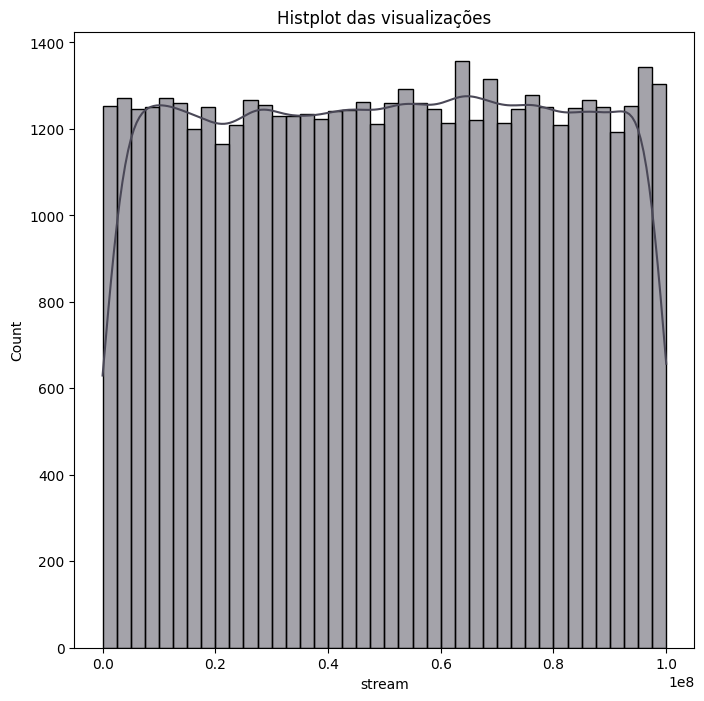

In [13]:
plt.figure(figsize = (8,8))
sns.histplot(df['stream'], kde = True, bins = 40, color = '#4a4857').set(title = 'Histplot das visualizações')
# É possível análisar que os dados estão bem distribuidos e não possuem outliers (valores fora da curva)

**Visualizando o gráfico estilo boxplot da coluna (stream)**

[Text(0.5, 1.0, 'Boxplot das visualizações')]

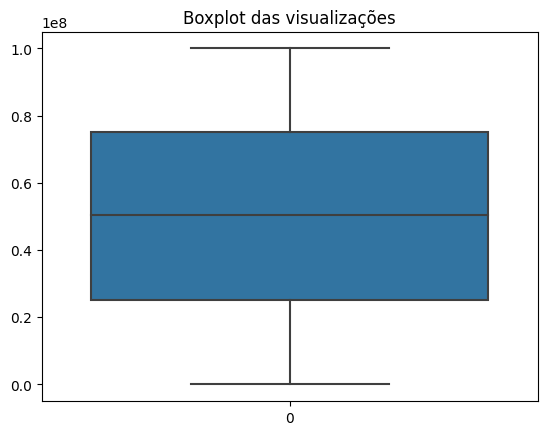

In [14]:
sns.boxplot(df['stream']).set(title = 'Boxplot das visualizações')
# Como citado anteriormente, não possuem outliers na coluna (stream) 

**Verificação do Histplot da coluna (duration)**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Histplot da duração')]

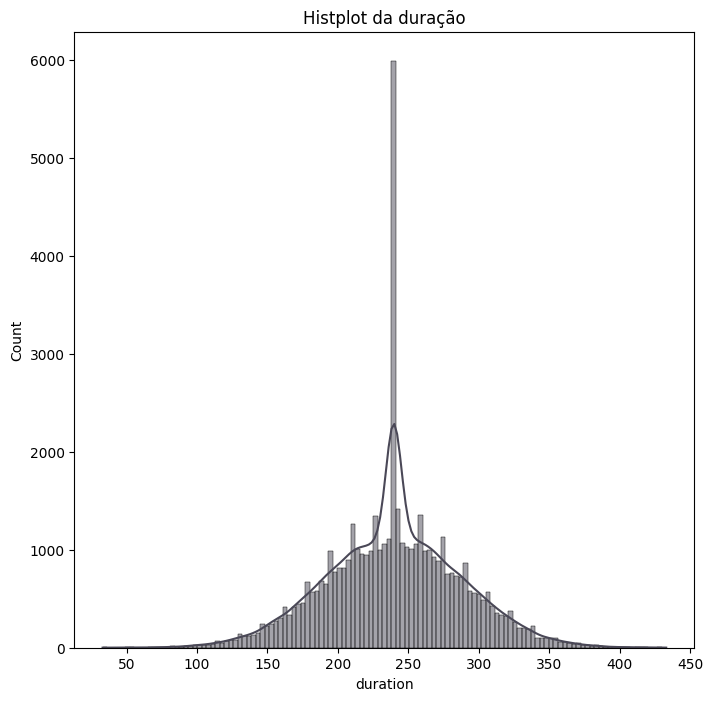

In [15]:
plt.figure(figsize = (8,8))
sns.histplot(df['duration'], kde = True, color = '#4a4857').set(title = 'Histplot da duração')
# É possível visualizar atráves do gráfico que existem outliers nesta coluna, mas como músicas apresentam
# durações variáveis, não é preciso a correção desses valores.

**Visualizando o gráfico estilo boxplot da coluna (duration)**

[Text(0.5, 1.0, 'Boxplot da duração')]

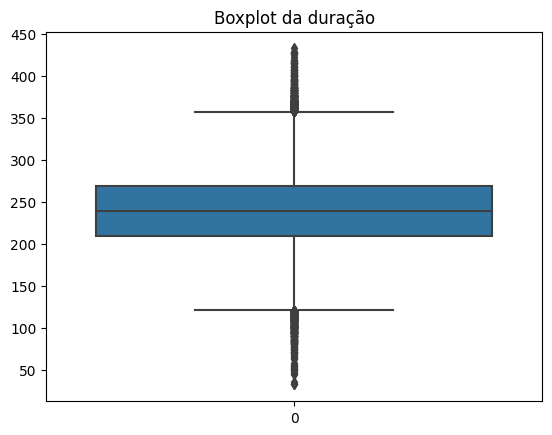

In [16]:
sns.boxplot(df['duration']).set(title = 'Boxplot da duração')
# Como citado anteriormente, existem outliers que permaneceram no dataset.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Histplot da popularidade')]

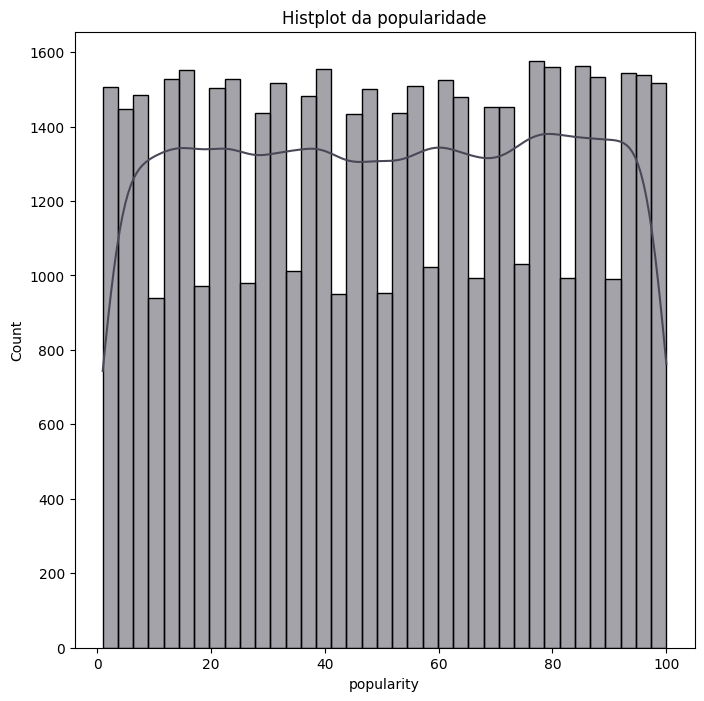

In [17]:
plt.figure(figsize = (8,8))
sns.histplot(df['popularity'], kde = True, color = '#4a4857').set(title = 'Histplot da popularidade')

[Text(0.5, 1.0, 'Boxplot da popularidade')]

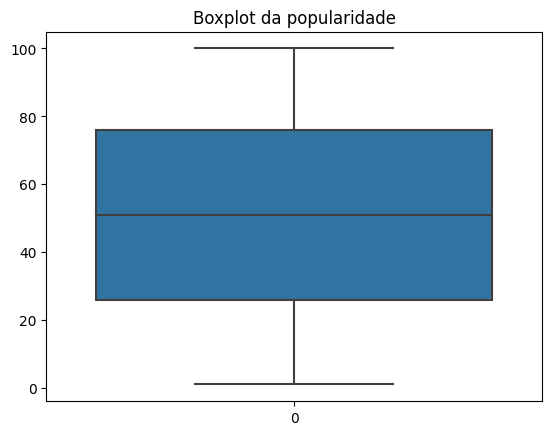

In [18]:
sns.boxplot(df['popularity']).set(title = 'Boxplot da popularidade')

**Verificação do dataset após o tratamento de dados**

In [19]:
df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.00,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,Does not have
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.00,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,Does not have
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,239.66,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,Does not have
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.00,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,Does not have
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.00,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,Does not have


In [20]:
df.describe()

,release_date,duration,popularity,stream
count,50000,50000.000000,50000.000000,5.000000e+04
mean,2009-10-01 17:25:40.224000,239.659260,50.783440,5.019183e+07
min,1994-10-06 00:00:00,33.000000,1.000000,1.899000e+03
25%,2002-03-25 18:00:00,210.000000,26.000000,2.523311e+07
50%,2009-09-25 00:00:00,239.660000,51.000000,5.042169e+07
75%,2017-04-19 00:00:00,269.000000,76.000000,7.519064e+07
max,2024-10-05 00:00:00,433.000000,100.000000,9.999913e+07
std,NaN,47.563823,28.948749,2.893624e+07


**Conjunto de cores que serão utilizadas no gráfico**

In [21]:
cores = ['#6da67a','#77b885','#86c28b','#859987','#4a4857']

# **Gráfico das visualizações (stream) por gênero músical (genre)**

Text(0, 0.5, 'Gênero Músical')

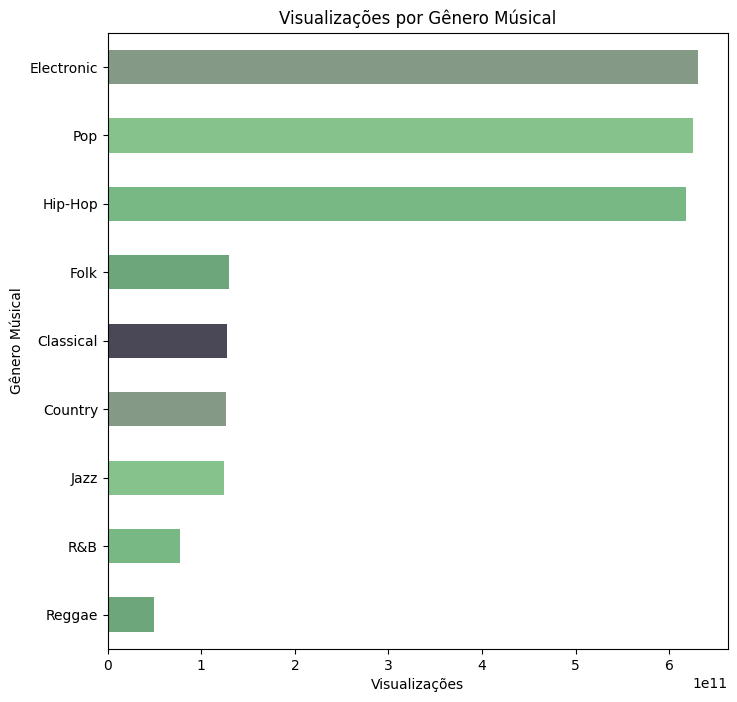

In [22]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby('genre')['stream'].sum().sort_values(ascending = True)
agrupamento.plot(kind = 'barh', title = 'Visualizações por Gênero Músical', color = cores)
plt.xlabel('Visualizações')
plt.ylabel('Gênero Músical')
# Os gêneros (Electronic, Pop e Hip-Hop) apresentam maiores visualizações em comparação os demais.

# Gráfico da popularidade (popularity) por gênero músical (genre)

Text(0, 0.5, 'Gênero Músical')

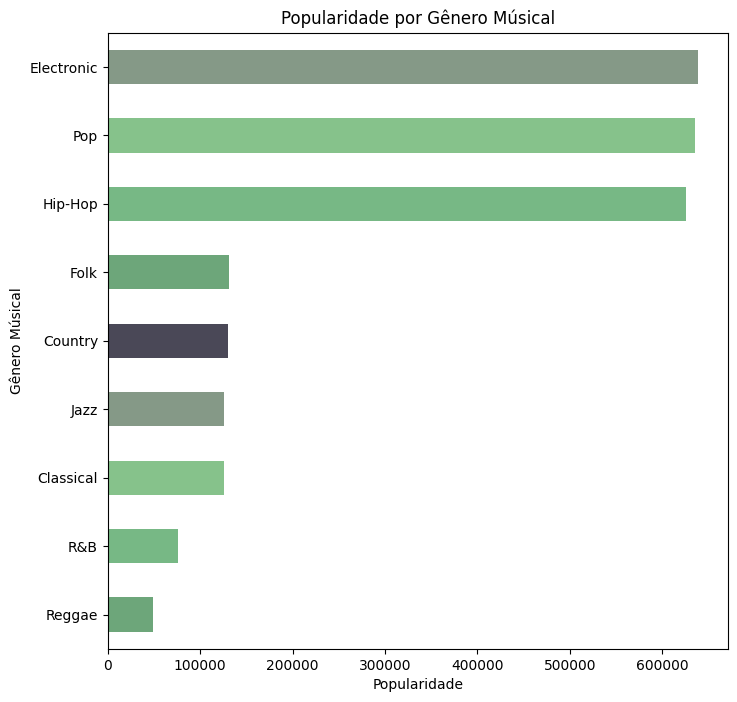

In [23]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby('genre')['popularity'].sum().sort_values(ascending = True)
agrupamento.plot(kind = 'barh', color = cores, title = 'Popularidade por Gênero Músical')
plt.xlabel('Popularidade')
plt.ylabel('Gênero Músical')
# Não muito diferente do gráfico anterior, ainda é possível análisar a mesma tendência dos 3 primeiros gêneros músicais

# Gráfico dos 10 Artistas (artist) mais visualizados (stream)

Text(0.5, 0, 'Visualizações')

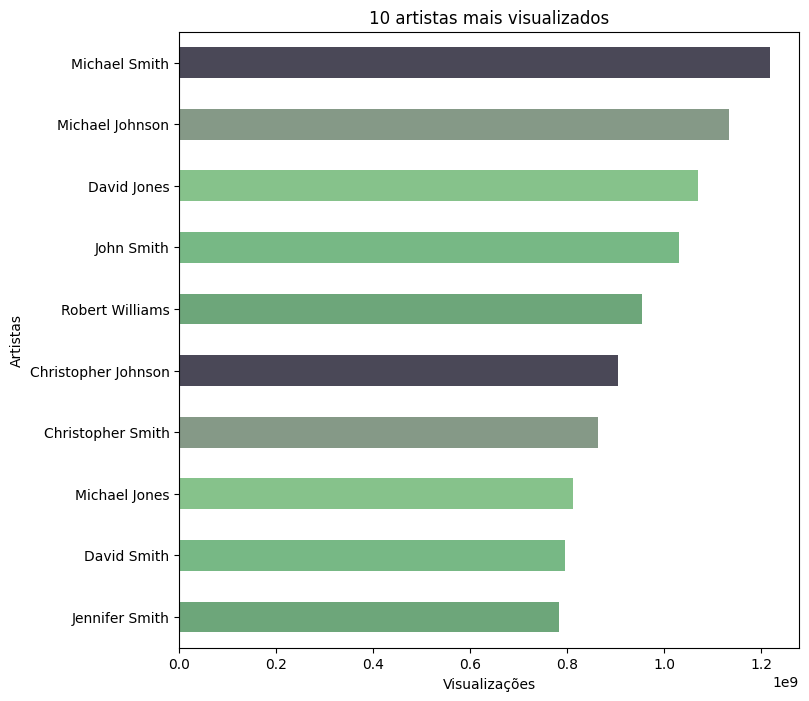

In [24]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby('artist')['stream'].sum().sort_values(ascending = True).tail(10)
agrupamento.plot(kind = 'barh', color = cores, title = '10 artistas mais visualizados')
plt.ylabel('Artistas')
plt.xlabel('Visualizações')
# O gráfico é baseado no número de visualizações que cada artista possue em suas músicas

# Gráfico dos 10 Álbuns (album) e seus artistas (artist) mais visualizados (stream)

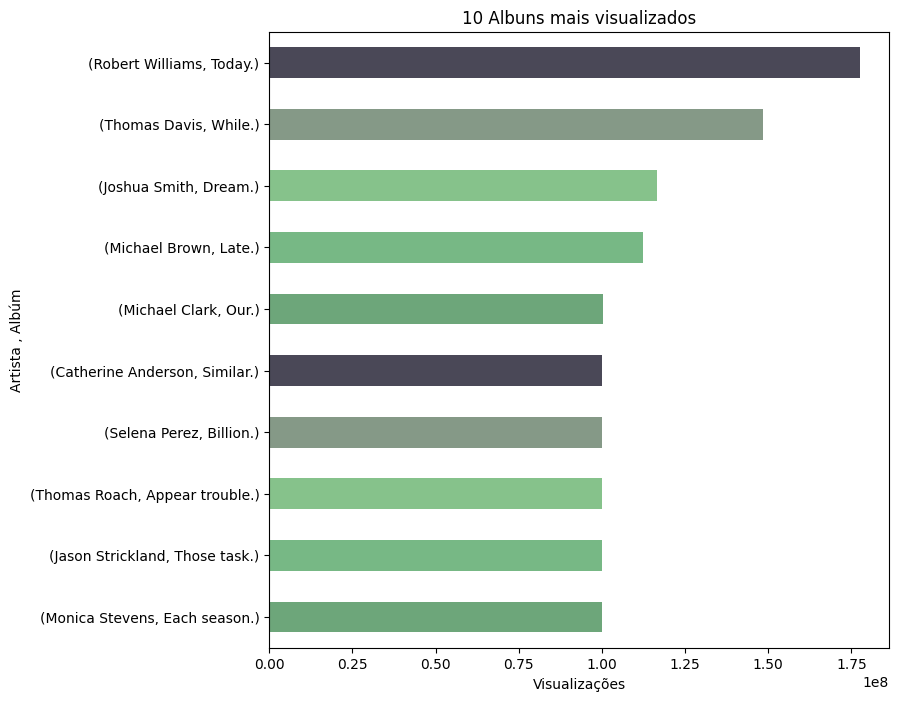

In [25]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby(['artist','album'])['stream'].sum().sort_values(ascending = True).tail(10)
agrupamento.plot(kind = 'barh', title = '10 Albuns mais visualizados', color = cores)
plt.xlabel('Visualizações')
plt.ylabel('Artista , Albúm')
plt.show()
# O gráfico é baseado no artista, o álbum produzido e a quantidade de visualizações que possue

# Gráfico das visualizações por linguagem (language) e conteúdo explícito (explicit_content)

Text(0, 0.5, 'Visualizações')

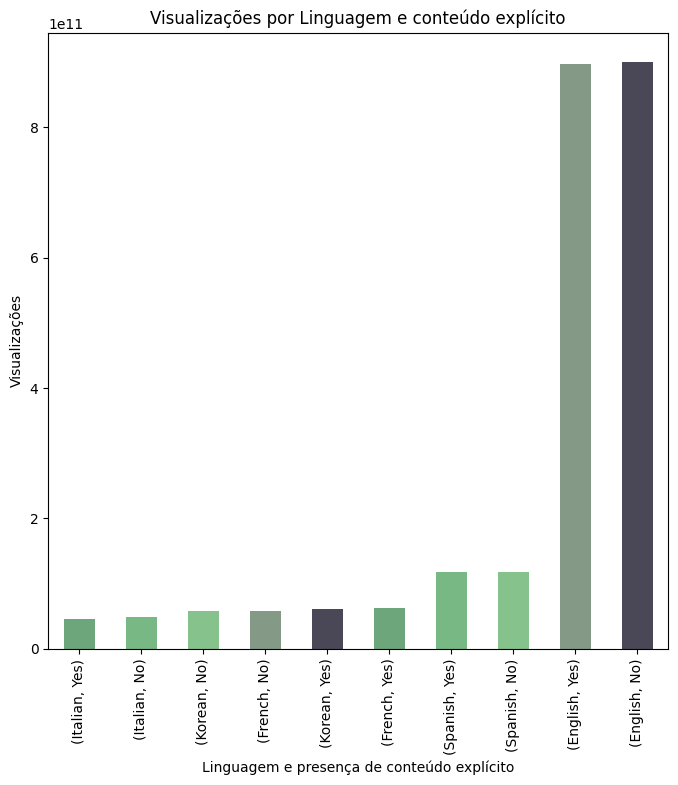

In [26]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby(['language','explicit_content'])['stream'].sum().sort_values(ascending = True).tail(10)
agrupamento.plot(kind = 'bar', color = cores, title = 'Visualizações por Linguagem e conteúdo explícito')
plt.xlabel('Linguagem e presença de conteúdo explícito')
plt.ylabel('Visualizações')
# O gráfico análisa a quantidade de visualizações que as músicas possuem caso tenham conteúdo explícito

# Gráfico das visualizações (stream) por gravadora (label)

Text(0, 0.5, 'Gravadora')

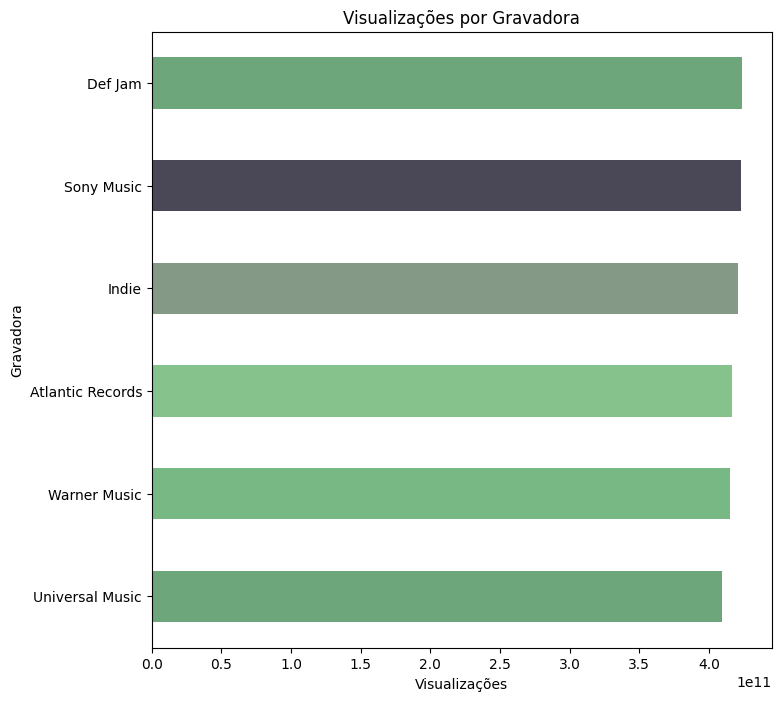

In [27]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby('label')['stream'].sum().sort_values(ascending = True).tail(10)
agrupamento.plot(kind = 'barh', color = cores, title = 'Visualizações por Gravadora')
plt.xlabel('Visualizações')
plt.ylabel('Gravadora')
# O gráfico análisa a quantidade de visualizações por gravadora

# Gráfico da quantidade de músicas produzidas por gravadora (label)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Universal Music'),
  Text(1, 0, 'Warner Music'),
  Text(2, 0, 'Atlantic Records'),
  Text(3, 0, 'Sony Music'),
  Text(4, 0, 'Indie'),
  Text(5, 0, 'Def Jam')])

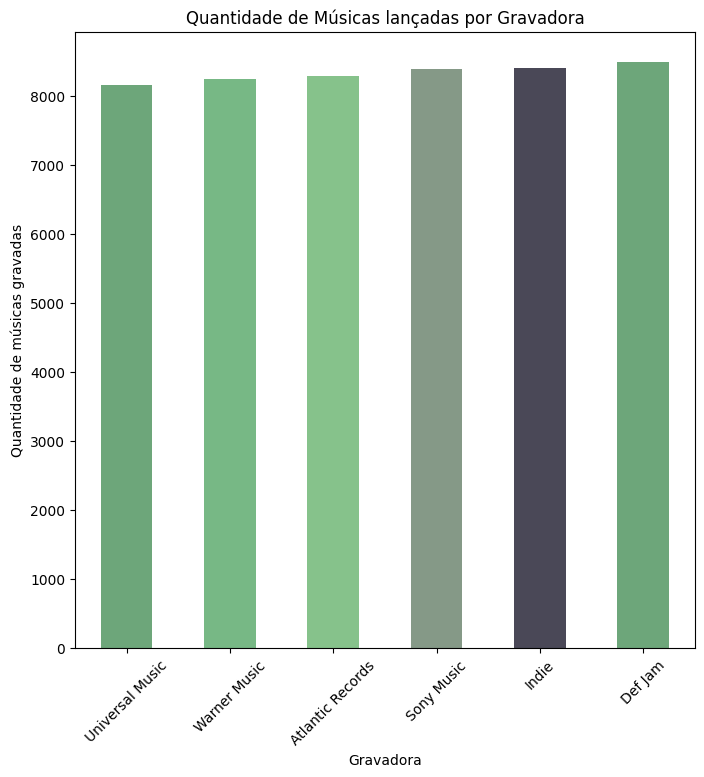

In [28]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby('label')['song_title'].size().sort_values(ascending = True)
agrupamento.plot(kind = 'bar', color = cores, title = 'Quantidade de Músicas lançadas por Gravadora')
plt.xlabel('Gravadora')
plt.ylabel('Quantidade de músicas gravadas')
plt.xticks(rotation = 45)
# Enfatizando o gráfico anterior, este mostra o número de músicas lançadas por gravadora

# Gráfico dos top 5 compositores 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'John Smith'),
  Text(1, 0, 'Robert Smith'),
  Text(2, 0, 'Michael Williams'),
  Text(3, 0, 'Michael Smith'),
  Text(4, 0, 'Michael Jones')])

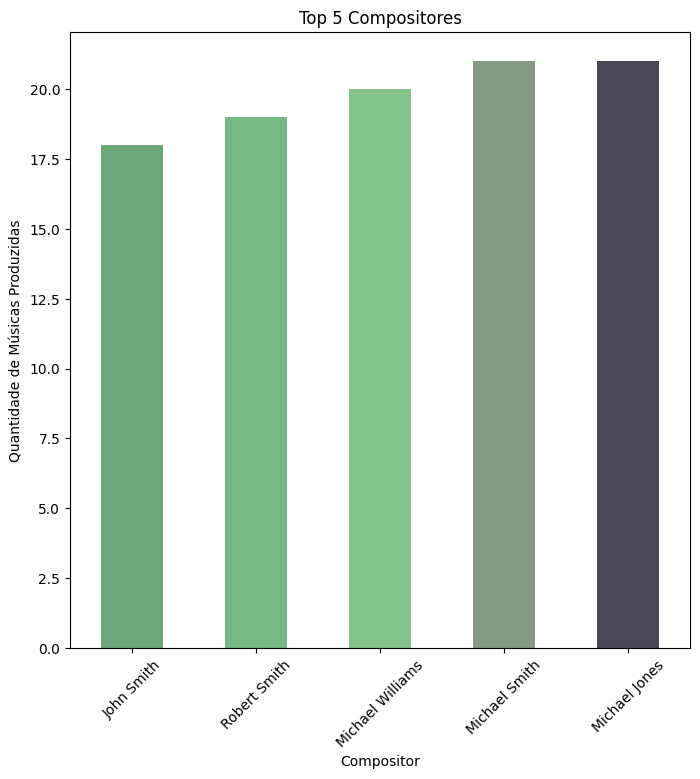

In [29]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby('composer')['song_title'].size().sort_values(ascending = True).tail(5)
agrupamento.plot(kind = 'bar', title = 'Top 5 Compositores', color = cores)
plt.xlabel('Compositor')
plt.ylabel('Quantidade de Músicas Produzidas')
plt.xticks(rotation = 45)
# O gráfico análisa a quantidade de músicas produzidas por compositores

# Gráfico dos top 5 produtores

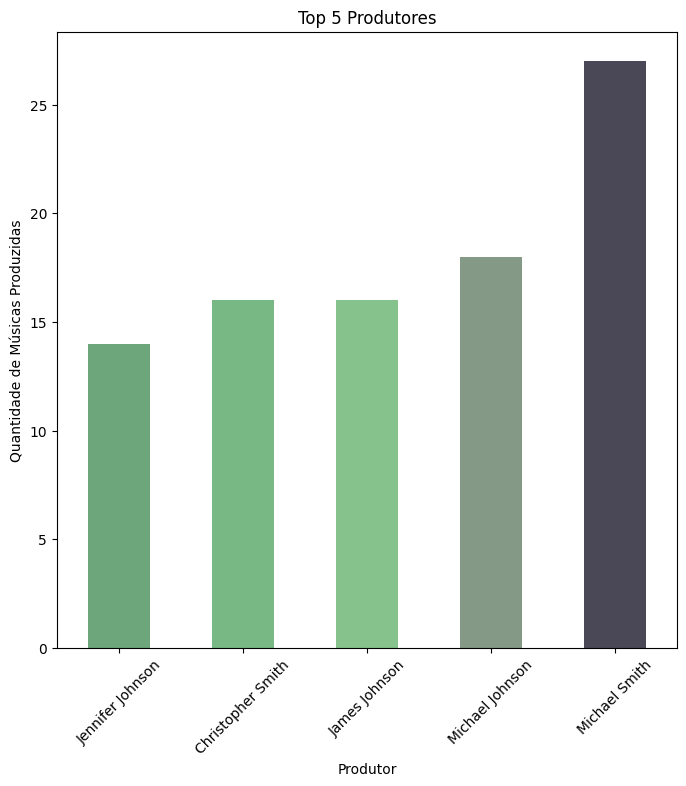

In [30]:
plt.figure(figsize = (8,8))
agrupamento = df.groupby('producer')['song_title'].size().sort_values(ascending = True).tail(5)
agrupamento.plot(kind = 'bar', title = 'Top 5 Produtores', color = cores)
plt.xlabel('Produtor')
plt.ylabel('Quantidade de Músicas Produzidas')
plt.xticks(rotation = 45)
plt.show()
# Gráfico análisa a quantidade de músicas produzidas por produtores

**Verificação de correlação das variáveis númericas**

<Axes: >

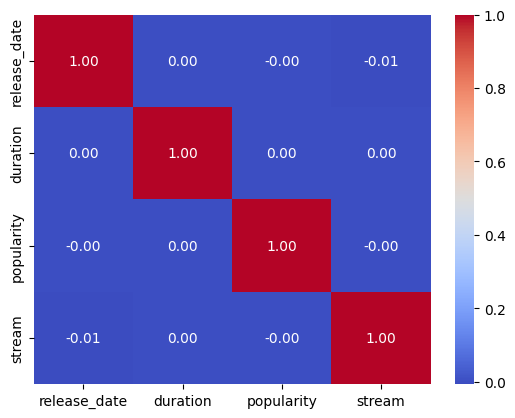

In [31]:
df_sem_objetos = df.select_dtypes(exclude = 'object')
correlacao = df_sem_objetos.corr()
sns.heatmap(correlacao, annot = True, cmap = 'coolwarm', fmt = '.2f')
# Verificação de correlação entre as variáveis númericas.
# Não houve correlação, portanto não é recomendado criar um modelo de machine learning.

# CONCLUSÃO DA ANÁLISE 
**O dataset é muito bom para estudo, foi possível colocar díversos conhecimentos em prática, que mesmo básicos, é fundamental em uma boa análise do conjunto.**

**A criação de gráficos e seu entendimento foram de suma importância no entendimento dos dados.**